# DECISION TREE PROJECT TUTORIAL

## OBJECTIVE:
## Predict whether or not a patient has diabetes based on diagnostic measurements

In [2]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.metrics import f1_score
from imblearn.metrics import specificity_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

### 0. Data ingestion

In [3]:
df_diabetes = pd.read_csv("https://breathecode.herokuapp.com/asset/internal-link?id=930&path=diabetes.csv")

### 1. General information about the dataset:

#### 1.0. Shape, missing values, and data type

In [4]:
df_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df_diabetes.shape

(768, 9)

In [6]:
missing_values = df_diabetes.isnull().sum()
missing_values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### 1.1. Checking for duplicates in the dataset and removing them if necessary

In [8]:
df_diabetes.duplicated().sum()

np.int64(0)

#### 1.2. Information about number of null or empty values in each column

In [9]:
df_diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

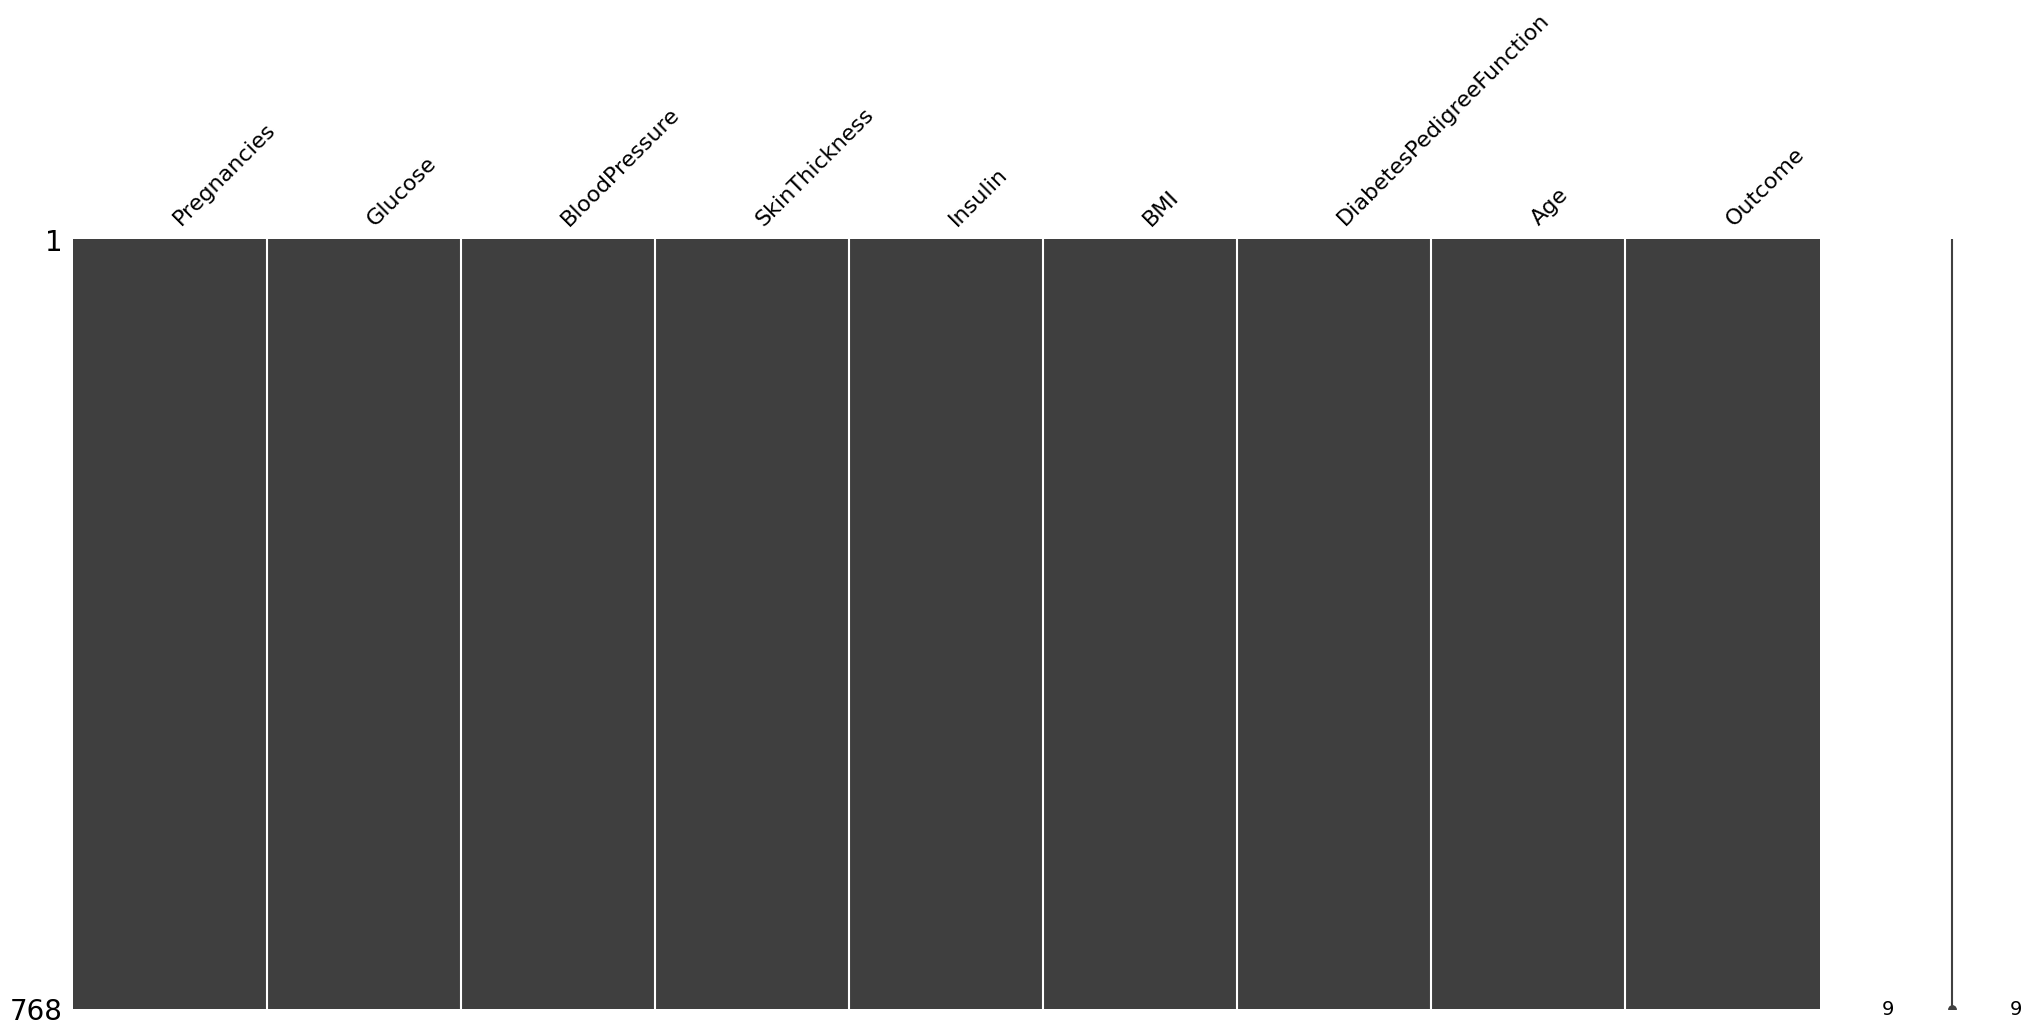

In [10]:
msno.matrix(df_diabetes)

#### 1.3. Fill in the missing values using the average of each numerical column (if necessary)

In [11]:
# df_diabetes = df_diabetes.fillna(df_diabetes.mean(numeric_only = True))
# df_diabetes.isna().sum()

### 4. Visualise the realtionship between the caracteristics of the data set

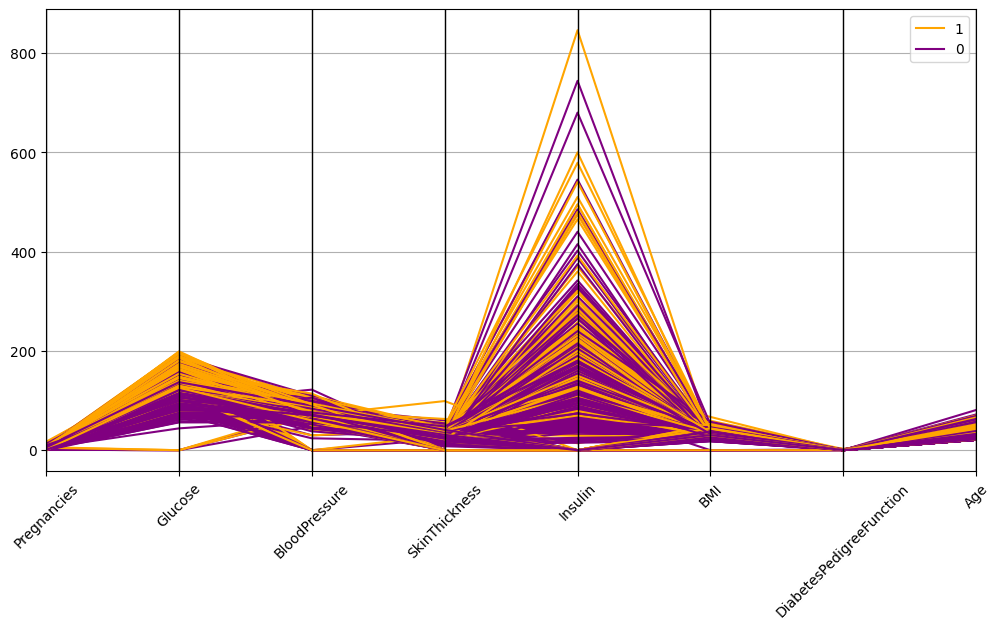

In [12]:
plt.figure(figsize = (12, 6))
pd.plotting.parallel_coordinates(df_diabetes, "Outcome", color = ["orange", "purple"])
plt.xticks(rotation = 45)
plt.tight_layout
plt.show()

### 5.Preparation for modelling

#### 5.0. Data division:

In [13]:
training_data, temp_data = train_test_split(df_diabetes, test_size = 0.4, random_state = 42)
testing_data, anonymous_data = train_test_split(temp_data, test_size = 0.5, random_state = 42)
training_data.shape, testing_data.shape, anonymous_data.shape, df_diabetes.shape

((460, 9), (154, 9), (154, 9), (768, 9))

#### 5.1. Variables definition:

In [14]:
X_train = training_data.drop(columns = "Outcome")
y_train = training_data["Outcome"]
X_test = testing_data.drop(columns = "Outcome")
y_test = testing_data["Outcome"]

### 6. Simple Tree Model creation 

In [15]:
simple_tree = DecisionTreeClassifier(max_depth = 3, max_features = X_train.shape[1]//2, min_samples_leaf = 20, random_state = 42)
simple_tree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,20
,min_weight_fraction_leaf,0.0
,max_features,4
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


#### 6.0. Visualising Simple Tree Decision model:

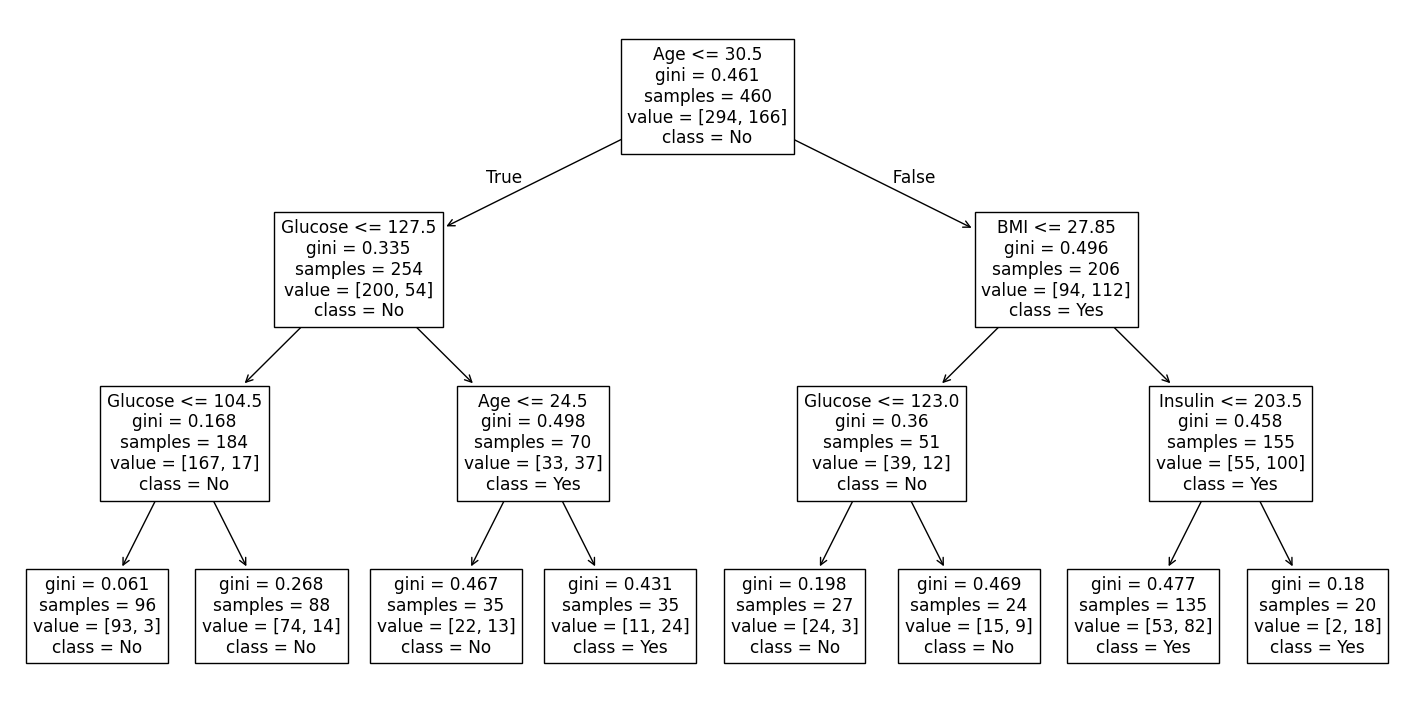

In [16]:
plt.figure(figsize = (18,9))
plot_tree(simple_tree, feature_names = X_train.columns, class_names = ["No", "Yes"])
plt.show()

In [17]:
text_representation = export_text(simple_tree, feature_names = list(X_train.columns))
print(text_representation)

|--- Age <= 30.50
|   |--- Glucose <= 127.50
|   |   |--- Glucose <= 104.50
|   |   |   |--- class: 0
|   |   |--- Glucose >  104.50
|   |   |   |--- class: 0
|   |--- Glucose >  127.50
|   |   |--- Age <= 24.50
|   |   |   |--- class: 0
|   |   |--- Age >  24.50
|   |   |   |--- class: 1
|--- Age >  30.50
|   |--- BMI <= 27.85
|   |   |--- Glucose <= 123.00
|   |   |   |--- class: 0
|   |   |--- Glucose >  123.00
|   |   |   |--- class: 0
|   |--- BMI >  27.85
|   |   |--- Insulin <= 203.50
|   |   |   |--- class: 1
|   |   |--- Insulin >  203.50
|   |   |   |--- class: 1



### 7. Complex Tree Model creation 

In [18]:
complex_tree = DecisionTreeClassifier(max_depth = 100, min_samples_leaf = 1, random_state = 42)
complex_tree.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,100
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


#### 7.0. Visualising Simple Tree Decision model:

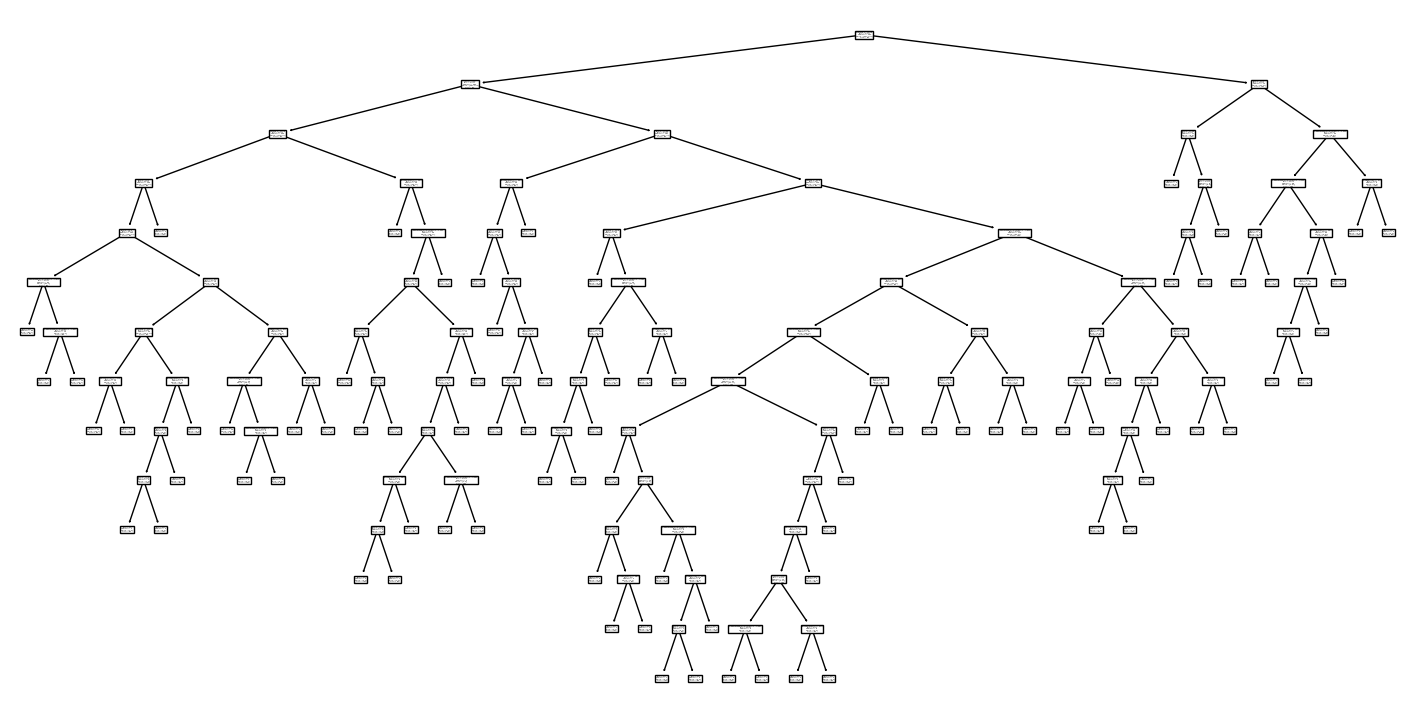

In [19]:
plt.figure(figsize = (18,9))
plot_tree(complex_tree, feature_names = X_train.columns, class_names = ["No", "Yes"])
plt.show()

In [20]:
text_representation = export_text(complex_tree, feature_names = list(X_train.columns))
print(text_representation)

|--- Glucose <= 154.50
|   |--- Age <= 28.50
|   |   |--- Glucose <= 127.50
|   |   |   |--- BMI <= 49.10
|   |   |   |   |--- BMI <= 31.40
|   |   |   |   |   |--- DiabetesPedigreeFunction <= 0.67
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- DiabetesPedigreeFunction >  0.67
|   |   |   |   |   |   |--- DiabetesPedigreeFunction <= 0.70
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- DiabetesPedigreeFunction >  0.70
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |--- BMI >  31.40
|   |   |   |   |   |--- Insulin <= 9.00
|   |   |   |   |   |   |--- Glucose <= 111.50
|   |   |   |   |   |   |   |--- SkinThickness <= 40.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- SkinThickness >  40.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- Glucose >  111.50
|   |   |   |   |   |   |   |--- BloodPressure <= 72.00
|   |   |   |   |   |   |   |   |--- BMI <= 37.40
|   |   |   |   |  

### 8. Simple and Complex Tree Model Metrics comparation

In [21]:
def get_metrics(y_train, y_test, y_pred_train, y_pred_test):
    train_accuracy = accuracy_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)
    train_auc = roc_auc_score(y_train, y_pred_train)
    train_precision = precision_score(y_train, y_pred_train)
    train_recall = recall_score(y_train, y_pred_train)
    train_specificity = specificity_score(y_train, y_pred_train)
    
    test_accuracy = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)
    test_auc = roc_auc_score(y_test, y_pred_test)
    test_precision = precision_score(y_test, y_pred_test)
    test_recall = recall_score(y_test, y_pred_test)
    test_specificity = specificity_score(y_test, y_pred_test)
    
    diff_accuracy = train_accuracy - test_accuracy
    diff_f1 = train_f1 - test_f1
    diff_auc = train_auc - test_auc
    diff_precision = train_precision - test_precision
    diff_recall = train_recall - test_recall
    diff_specificity = train_specificity - test_specificity
    
    metrics_df = pd.DataFrame(
        [
            [train_accuracy, train_f1, train_auc, train_precision, train_recall, train_specificity],
            [test_accuracy, test_f1, test_auc, test_precision, test_recall, test_specificity],
            [diff_accuracy, diff_f1, diff_auc, diff_precision, diff_recall, diff_specificity]
        ],
        columns=["Accuracy", "F1", "AUC", "Precision", "Recall", "Specificity"],
        index=["Train", "Test", "Diferencia"]
    )
    return metrics_df

In [22]:
train_pred_simple = simple_tree.predict(X_train)
test_pred_simple = simple_tree.predict(X_test)
train_pred_complex = complex_tree.predict(X_train)
test_pred_complex = complex_tree.predict(X_test)

In [23]:
get_metrics(y_train, y_test, train_pred_simple, test_pred_simple)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,0.765217,0.696629,0.761249,0.652632,0.746988,0.775510
Test,0.668831,0.564103,0.666538,0.492537,0.660000,0.673077
Diferencia,0.096386,0.132527,0.094711,0.160094,0.086988,0.102433


In [24]:
get_metrics(y_train, y_test, train_pred_complex, test_pred_complex)

,Accuracy,F1,AUC,Precision,Recall,Specificity
Train,1.000000,1.000000,1.000000,1.000000,1.00,1.000000
Test,0.714286,0.633333,0.726154,0.542857,0.76,0.692308
Diferencia,0.285714,0.366667,0.273846,0.457143,0.24,0.307692


### 9. Complex Tree Model Metrics Confusion Matrix

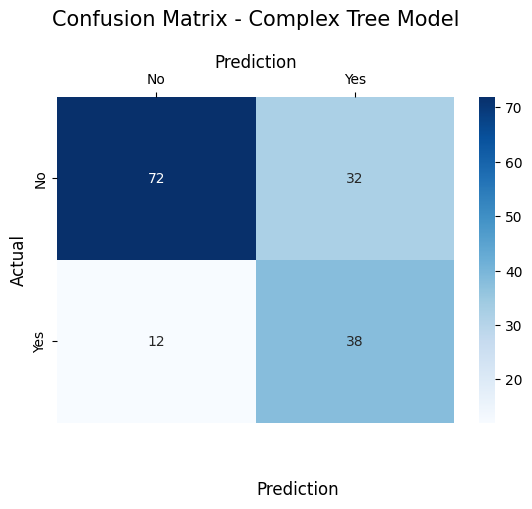

In [25]:
cm = confusion_matrix(y_test, test_pred_complex)
sns.heatmap(cm,
            annot = True,
            fmt = "g",
            cmap = "Blues",
            xticklabels = ["No", "Yes"],
            yticklabels = ["No", "Yes"])
plt.title("Confusion Matrix - Complex Tree Model", fontsize = 15, pad = 20)
plt.xlabel("Prediction", fontsize = 12)
plt.ylabel("Actual", fontsize = 12)
plt.gca().xaxis.set_label_position("top")
plt.gca().xaxis.tick_top()
plt.gca().figure.subplots_adjust(bottom = 0.2)
plt.gca().figure.text(0.5, 0.05, "Prediction", ha = "center", fontsize = 12)
plt.show()

#### 9.0. Precision:

In [26]:
(38)/(38 + 32)

0.5428571428571428

#### 9.1. Accuracy:

In [27]:
(38 + 72)/(38 + 72 + 32 + 12)

0.7142857142857143

#### 9.1. Recall:

In [31]:
(38) / (38 + 12)

0.76

### 10. Show probabilities

In [30]:
simple_tree.predict_proba(X_train)

array([[0.96875   , 0.03125   ],
       [0.625     , 0.375     ],
       [0.84090909, 0.15909091],
       [0.39259259, 0.60740741],
       [0.39259259, 0.60740741],
       [0.96875   , 0.03125   ],
       [0.84090909, 0.15909091],
       [0.84090909, 0.15909091],
       [0.1       , 0.9       ],
       [0.96875   , 0.03125   ],
       [0.96875   , 0.03125   ],
       [0.84090909, 0.15909091],
       [0.625     , 0.375     ],
       [0.39259259, 0.60740741],
       [0.39259259, 0.60740741],
       [0.84090909, 0.15909091],
       [0.88888889, 0.11111111],
       [0.625     , 0.375     ],
       [0.96875   , 0.03125   ],
       [0.96875   , 0.03125   ],
       [0.62857143, 0.37142857],
       [0.96875   , 0.03125   ],
       [0.96875   , 0.03125   ],
       [0.96875   , 0.03125   ],
       [0.96875   , 0.03125   ],
       [0.1       , 0.9       ],
       [0.39259259, 0.60740741],
       [0.84090909, 0.15909091],
       [0.39259259, 0.60740741],
       [0.39259259, 0.60740741],
       [0.